<a href="https://colab.research.google.com/github/SebasM2000/DataBase_Sttcs/blob/main/comp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive", force_remount = True)
%cd /content/gdrive/MyDrive/parcial_computac/DataBase_Sttcs

! git pull

Mounted at /content/gdrive
/content/gdrive/MyDrive/parcial_computac/DataBase_Sttcs
Updating 264de3d..feca575
error: Your local changes to the following files would be overwritten by merge:
	comp.ipynb
Please commit your changes or stash them before you merge.
Aborting


In [ ]:
# Librerías
%autosave 60
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf

Autosaving every 60 seconds


> **Nota:** En este trabajo, se eligieron las primeras 31 columnas (que se exponen en las siguiente celda) para facilitar el análisis de nuestra base de datos. Además, consideramos que las variables elegidas son las más relevantes para nuestro estudio.

In [ ]:
# Abriendo archivo csv
datos = pd.read_csv("METABRIC_RNA_Mutation.csv")
datos.columns[:31]

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (678,688,690,692) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


Index(['patient_id', 'age_at_diagnosis', 'type_of_breast_surgery',
       'cancer_type', 'cancer_type_detailed', 'cellularity', 'chemotherapy',
       'pam50_+_claudin-low_subtype', 'cohort', 'er_status_measured_by_ihc',
       'er_status', 'neoplasm_histologic_grade',
       'her2_status_measured_by_snp6', 'her2_status',
       'tumor_other_histologic_subtype', 'hormone_therapy',
       'inferred_menopausal_state', 'integrative_cluster',
       'primary_tumor_laterality', 'lymph_nodes_examined_positive',
       'mutation_count', 'nottingham_prognostic_index', 'oncotree_code',
       'overall_survival_months', 'overall_survival', 'pr_status',
       'radio_therapy', '3-gene_classifier_subtype', 'tumor_size',
       'tumor_stage', 'death_from_cancer'],
      dtype='object')

> <h2> Primer paso: selección y explicación de variables </h2>
>
> Inicialmente, se seleccionan las variables que se utilizarán y se analiza cada columna individualmente para determinar si tiene un significado coherente en el modelo que se vaya a realizar. Así, la contribución de cada columna es la siguiente:
>
> - **patient_id:** Es la identificación única de cada paciente
> - **type_of_breast_surgery:** Expone el tipo de cirugía a la que fue sometida cada paciente.
> - **cancer_type_detailed:** Contiene la información específica del tipo de cáncer detectado.
> - **cellularity:** Describe las celulas cancerosas que se detectan en el tumor.
> - **neoplasm_histologic_grade:** Describe el aspecto de las células cancerosas en comparación con las células sana de 1 a 3.

Esta información es proporcionada por Breastcancer.org.
Donar para apoyar recursos gratuitos y programación para las personas afectadas por cáncer de mama: https://give.breastcancer.org/give/297660/#!/donation/checkout?c_src=clipboard&c_src2=text-link
> - **lymph_nodes_examined_positive:** Describe cuantos ganglios linfáticos han detectado células cancerosas.
> - **nottingham_prognostic_index:** Evalua el grado de deformacion de las celulas de 1 a 9.
> - **overall_survival_months:** Determina cuantos meses quedan de vida en los pacientes.
> - **tumor_stage:** Describe cuanto cancer hay en el cuerpo clasificando en etapas de 1 a 4.
> - **death_from_cancer:** Pacientes que murieron por cancer o por otras circunstancias.

In [ ]:
# Tabla de las variables seleccionadas
analisis = pd.DataFrame(datos, columns=["patient_id","type_of_breast_surgery", 
                                      "cancer_type_detailed", "cellularity","neoplasm_histologic_grade",
                                      "lymph_nodes_examined_positive", "nottingham_prognostic_index",
                                      "overall_survival_months", "tumor_stage","death_from_cancer"])
analisis.head()

,patient_id,type_of_breast_surgery,cancer_type_detailed,cellularity,neoplasm_histologic_grade,lymph_nodes_examined_positive,nottingham_prognostic_index,overall_survival_months,tumor_stage,death_from_cancer
0,0,MASTECTOMY,Breast Invasive Ductal Carcinoma,NaN,3.0,10.0,6.044,140.500000,2.0,Living
1,2,BREAST CONSERVING,Breast Invasive Ductal Carcinoma,High,3.0,0.0,4.020,84.633333,1.0,Living
2,5,MASTECTOMY,Breast Invasive Ductal Carcinoma,High,2.0,1.0,4.030,163.700000,2.0,Died of Disease
3,6,MASTECTOMY,Breast Mixed Ductal and Lobular Carcinoma,Moderate,2.0,3.0,4.050,164.933333,2.0,Living
4,8,MASTECTOMY,Breast Mixed Ductal and Lobular Carcinoma,High,3.0,8.0,6.080,41.366667,2.0,Died of Disease


In [ ]:
analisis.info()
analisis.isnull().sum()# se toma como variable independiente neoplasm_histologic_grade 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1904 entries, 0 to 1903
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   patient_id                     1904 non-null   int64  
 1   type_of_breast_surgery         1882 non-null   object 
 2   cancer_type_detailed           1889 non-null   object 
 3   cellularity                    1850 non-null   object 
 4   neoplasm_histologic_grade      1832 non-null   float64
 5   lymph_nodes_examined_positive  1904 non-null   float64
 6   nottingham_prognostic_index    1904 non-null   float64
 7   overall_survival_months        1904 non-null   float64
 8   tumor_stage                    1403 non-null   float64
 9   death_from_cancer              1903 non-null   object 
dtypes: float64(5), int64(1), object(4)
memory usage: 148.9+ KB


patient_id                         0
type_of_breast_surgery            22
cancer_type_detailed              15
cellularity                       54
neoplasm_histologic_grade         72
lymph_nodes_examined_positive      0
nottingham_prognostic_index        0
overall_survival_months            0
tumor_stage                      501
death_from_cancer                  1
dtype: int64

> <h2> Segundo paso </h2>
>
> Ahora, se deben eliminar aquellos datos que no aporten a la base de datos, es decir, los valores nulos; ya que pueden generar errores en los diferentes parámetros estadísticos que se calculen como la mediana, el promedio, la media, entre otros.
>
> El propósito de la siguiente celda es eliminar aquellas filas cuyos valores **NO** nulos ocupen al menos un 80% de los datos, ya que consideramos que si faltan al menos dos datos de cada paciente, puede dificultar el diagnóstico del mismo. El resultado fue que se eliminaron 6 filas. Posteriormente, se rectificó que no hubiesen identificaciones duplicadas en la base de datos, ya que es el único dato irrepetible.

In [ ]:
# Porcentaje de valores no nulos para la limpieza
porcentaje = 0.8

# Eliminación de valores nulos con cierto umbral
limpieza_1 = analisis.dropna(thresh = porcentaje*len(analisis.columns))
limpieza_1 = limpieza_1.drop_duplicates(["patient_id"])
limpieza_1

# Nota: Prestar atención a cualquier columna que:
# Esté mal formateada,
# Requiere más datos o mucho procesamiento para convertirse en una característica útil
# Contiene información redundante

,patient_id,type_of_breast_surgery,cancer_type_detailed,cellularity,neoplasm_histologic_grade,lymph_nodes_examined_positive,nottingham_prognostic_index,overall_survival_months,tumor_stage,death_from_cancer
0,0,MASTECTOMY,Breast Invasive Ductal Carcinoma,NaN,3.0,10.0,6.044,140.500000,2.0,Living
1,2,BREAST CONSERVING,Breast Invasive Ductal Carcinoma,High,3.0,0.0,4.020,84.633333,1.0,Living
2,5,MASTECTOMY,Breast Invasive Ductal Carcinoma,High,2.0,1.0,4.030,163.700000,2.0,Died of Disease
3,6,MASTECTOMY,Breast Mixed Ductal and Lobular Carcinoma,Moderate,2.0,3.0,4.050,164.933333,2.0,Living
4,8,MASTECTOMY,Breast Mixed Ductal and Lobular Carcinoma,High,3.0,8.0,6.080,41.366667,2.0,Died of Disease
...,...,...,...,...,...,...,...,...,...,...
1899,7295,BREAST CONSERVING,Breast Invasive Lobular Carcinoma,High,3.0,1.0,5.050,196.866667,NaN,Living
1900,7296,MASTECTOMY,Breast Invasive Ductal Carcinoma,High,3.0,1.0,5.040,44.733333,NaN,Died of Disease
1901,7297,MASTECTOMY,Breast Invasive Ductal Carcinoma,High,3.0,45.0,6.050,175.966667,NaN,Died of Disease
1902,7298,MASTECTOMY,Breast Invasive Ductal Carcinoma,Moderate,2.0,12.0,5.050,86.233333,NaN,Died of Other Causes


> <h2> Propuesta de ecuación </h2>
>
> En nuestro análisis, decidimos predecir... **Propongo el estado del tumor (tumor_stage) o la celularidad (cellularity)**

In [ ]:
# Planteamiento de ecuación
# Creación de matriz de variables independientes
xi = limpieza_1.drop(["neoplasm_histologic_grade"], axis = 1)

# Creación de vector de variable dependiente
y = limpieza_1.loc[:, "neoplasm_histologic_grade"]

# Rango de la variable dependiente
#print(y.max())
#print(y.min())

# Contador de valores nulos en cada columna
#for i in limpieza_1.columns:
    #y = limpieza_1.loc[:, i]
    #print(y.isnull().sum())
    
# Modelo de regresión lineal
MRL = smf.ols(" neoplasm_histologic_grade   ~ patient_id + type_of_breast_surgery + cancer_type_detailed  +\
              cellularity + tumor_stage+ lymph_nodes_examined_positive +\
              nottingham_prognostic_index + overall_survival_months + death_from_cancer", 
              limpieza_1).fit()
print(MRL.summary())
print(MRL.params)

#sns.scatterplot(data=a,x=a["age_at_diagnosis"], y=a
                #["cellularity"])

                                OLS Regression Results                               
Dep. Variable:     neoplasm_histologic_grade   R-squared:                       0.702
Model:                                   OLS   Adj. R-squared:                  0.698
Method:                        Least Squares   F-statistic:                     213.2
Date:                       Sat, 22 Oct 2022   Prob (F-statistic):          4.17e-321
Time:                               15:12:07   Log-Likelihood:                -469.15
No. Observations:                       1285   AIC:                             968.3
Df Residuals:                           1270   BIC:                             1046.
Df Model:                                 14                                         
Covariance Type:                   nonrobust                                         
                                                                        coef    std err          t      P>|t|      [0.025      0.975]
------

In [ ]:
"""tenemos 4 variables categoricas ya que con ellas soloobtenemos informacion cualitativa, por lo tanto se las convierte
en variables numericas para que el algoritmo sea capaz de reconocerlas, para ello se utilizara un sistema de codificacion dummy

type_of_breast_surgery[T.MASTECTOMY]                                
cancer_type_detailed[T.Breast Invasive Ductal Carcinoma]            
cancer_type_detailed[T.Breast Invasive Lobular Carcinoma]           
cancer_type_detailed[T.Breast Invasive Mixed Mucinous Carcinoma]    
cancer_type_detailed[T.Breast Mixed Ductal and Lobular Carcinoma]   
cancer_type_detailed[T.Metaplastic Breast Cancer]                    
cellularity[T.Low]                                                   
cellularity[T.Moderate]                                              
death_from_cancer[T.Died of Other Causes]                            
death_from_cancer[T.Living] 
"""
#limpieza_1["cancer_type_detailed"].value_counts()
variables = pd.get_dummies(data=analisis, columns = [ "type_of_breast_surgery", 'cancer_type_detailed', 'cellularity', 'death_from_cancer'])
variables.head()




,patient_id,neoplasm_histologic_grade,lymph_nodes_examined_positive,nottingham_prognostic_index,overall_survival_months,tumor_stage,type_of_breast_surgery_BREAST CONSERVING,type_of_breast_surgery_MASTECTOMY,cancer_type_detailed_Breast,cancer_type_detailed_Breast Invasive Ductal Carcinoma,cancer_type_detailed_Breast Invasive Lobular Carcinoma,cancer_type_detailed_Breast Invasive Mixed Mucinous Carcinoma,cancer_type_detailed_Breast Mixed Ductal and Lobular Carcinoma,cancer_type_detailed_Metaplastic Breast Cancer,cellularity_High,cellularity_Low,cellularity_Moderate,death_from_cancer_Died of Disease,death_from_cancer_Died of Other Causes,death_from_cancer_Living
0,0,3.0,10.0,6.044,140.500000,2.0,0,1,0,1,0,0,0,0,0,0,0,0,0,1
1,2,3.0,0.0,4.020,84.633333,1.0,1,0,0,1,0,0,0,0,1,0,0,0,0,1
2,5,2.0,1.0,4.030,163.700000,2.0,0,1,0,1,0,0,0,0,1,0,0,1,0,0
3,6,2.0,3.0,4.050,164.933333,2.0,0,1,0,0,0,0,1,0,0,0,1,0,0,1
4,8,3.0,8.0,6.080,41.366667,2.0,0,1,0,0,0,0,1,0,1,0,0,1,0,0


In [ ]:
variables.columns


Index(['patient_id', 'neoplasm_histologic_grade',
       'lymph_nodes_examined_positive', 'nottingham_prognostic_index',
       'overall_survival_months', 'tumor_stage',
       'type_of_breast_surgery_BREAST CONSERVING',
       'type_of_breast_surgery_MASTECTOMY', 'cancer_type_detailed_Breast',
       'cancer_type_detailed_Breast Invasive Ductal Carcinoma',
       'cancer_type_detailed_Breast Invasive Lobular Carcinoma',
       'cancer_type_detailed_Breast Invasive Mixed Mucinous Carcinoma',
       'cancer_type_detailed_Breast Mixed Ductal and Lobular Carcinoma',
       'cancer_type_detailed_Metaplastic Breast Cancer', 'cellularity_High',
       'cellularity_Low', 'cellularity_Moderate',
       'death_from_cancer_Died of Disease',
       'death_from_cancer_Died of Other Causes', 'death_from_cancer_Living'],
      dtype='object')

In [143]:
analisis1=variables.loc[:,['patient_id',
       'lymph_nodes_examined_positive', 'nottingham_prognostic_index',
       'overall_survival_months',
       'type_of_breast_surgery_BREAST CONSERVING',
       'type_of_breast_surgery_MASTECTOMY', 
       'cancer_type_detailed_Breast Invasive Ductal Carcinoma',
       'cancer_type_detailed_Breast Invasive Lobular Carcinoma',
       'cancer_type_detailed_Breast Invasive Mixed Mucinous Carcinoma',
       'cancer_type_detailed_Breast Mixed Ductal and Lobular Carcinoma',
       'cancer_type_detailed_Metaplastic Breast Cancer', 'cellularity_High',
       'cellularity_Low', 'cellularity_Moderate' ,"cellularity_High",
       'death_from_cancer_Died of Disease',
       'death_from_cancer_Died of Other Causes', 'death_from_cancer_Living']]

In [ ]:
analisis1.info()
analisis1.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1904 entries, 0 to 1903
Data columns (total 18 columns):
 #   Column                                                          Non-Null Count  Dtype  
---  ------                                                          --------------  -----  
 0   patient_id                                                      1904 non-null   int64  
 1   neoplasm_histologic_grade                                       1832 non-null   float64
 2   lymph_nodes_examined_positive                                   1904 non-null   float64
 3   nottingham_prognostic_index                                     1904 non-null   float64
 4   overall_survival_months                                         1904 non-null   float64
 5   type_of_breast_surgery_BREAST CONSERVING                        1904 non-null   uint8  
 6   type_of_breast_surgery_MASTECTOMY                               1904 non-null   uint8  
 7   cancer_type_detailed_Breast                        

patient_id                                                         0
neoplasm_histologic_grade                                         72
lymph_nodes_examined_positive                                      0
nottingham_prognostic_index                                        0
overall_survival_months                                            0
type_of_breast_surgery_BREAST CONSERVING                           0
type_of_breast_surgery_MASTECTOMY                                  0
cancer_type_detailed_Breast                                        0
cancer_type_detailed_Breast Invasive Ductal Carcinoma              0
cancer_type_detailed_Breast Invasive Lobular Carcinoma             0
cancer_type_detailed_Breast Mixed Ductal and Lobular Carcinoma     0
cancer_type_detailed_Metaplastic Breast Cancer                     0
cellularity_High                                                   0
cellularity_Low                                                    0
cellularity_Moderate              

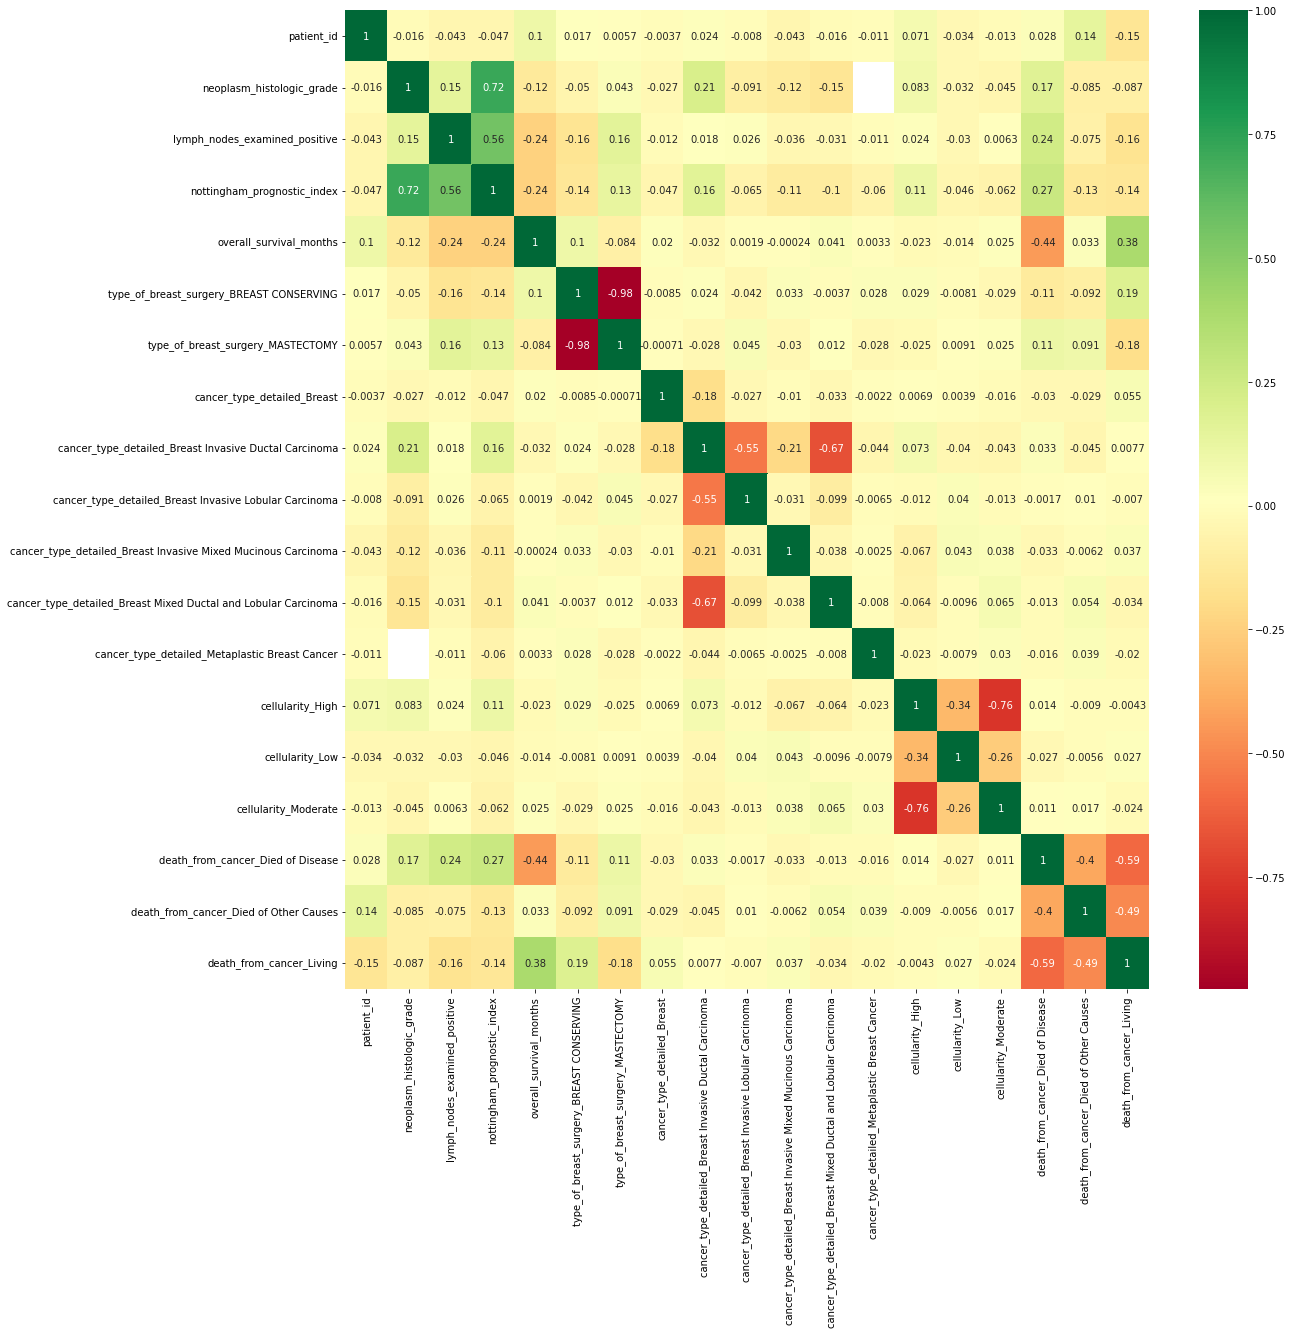

In [ ]:
#comparando variables independientes
plt.figure(figsize=(18,18))
sns.heatmap(analisis1.corr(), annot=True, cmap="RdYlGn")

In [144]:
#renombrando columnas

analisis2 = analisis1.rename(columns={"type_of_breast_surgery_BREAST CONSERVING":"type_of_breast_surgery_BREAST_CONSERVING",
                                   "cancer_type_detailed_Breast Invasive Ductal Carcinoma": "Breast_Invasive_Ductal_Carcinoma",
                                   "cancer_type_detailed_Breast Invasive Lobular Carcinoma":"Breast_Invasive_Lobular_Carcinoma",
                                  " cancer_type_detailed_Breast Invasive Mixed Mucinous Carcinoma":"Breast_Invasive_Mixed_Mucinous_Carcinoma",
                                  "cancer_type_detailed_Breast Mixed Ductal and Lobular Carcinoma":"Breast_Mixed_Ductal_and_Lobular_Carcinoma",
                                  "cancer_type_detailed_Metaplastic Breast Cancer":"Metaplastic_Breast_Cancer",
                                  "death_from_cancer_Died of Disease":"death_from_cancer_Died_of_Disease",
                                  "death_from_cancer_Died of Other Causes":"death_from_cancer_Died_of_Other_Causes"})

analisis2.head()


,patient_id,lymph_nodes_examined_positive,nottingham_prognostic_index,overall_survival_months,type_of_breast_surgery_BREAST_CONSERVING,type_of_breast_surgery_MASTECTOMY,Breast_Invasive_Ductal_Carcinoma,Breast_Invasive_Lobular_Carcinoma,cancer_type_detailed_Breast Invasive Mixed Mucinous Carcinoma,Breast_Mixed_Ductal_and_Lobular_Carcinoma,Metaplastic_Breast_Cancer,cellularity_High,cellularity_Low,cellularity_Moderate,cellularity_High,death_from_cancer_Died_of_Disease,death_from_cancer_Died_of_Other_Causes,death_from_cancer_Living
0,0,10.0,6.044,140.500000,0,1,1,0,0,0,0,0,0,0,0,0,0,1
1,2,0.0,4.020,84.633333,1,0,1,0,0,0,0,1,0,0,1,0,0,1
2,5,1.0,4.030,163.700000,0,1,1,0,0,0,0,1,0,0,1,1,0,0
3,6,3.0,4.050,164.933333,0,1,0,0,0,1,0,0,0,1,0,0,0,1
4,8,8.0,6.080,41.366667,0,1,0,0,0,1,0,1,0,0,1,1,0,0


In [170]:
from sklearn import preprocessing #escalando datos analisis2
import pandas as pd

d = preprocessing.MinMaxScaler(feature_range=(0,1))

col=analisis2.columns
res=d.fit_transform(analisis2)


scaled_df = pd.DataFrame(res, columns=col)
scaled_df.head()

,patient_id,lymph_nodes_examined_positive,nottingham_prognostic_index,overall_survival_months,type_of_breast_surgery_BREAST_CONSERVING,type_of_breast_surgery_MASTECTOMY,Breast_Invasive_Ductal_Carcinoma,Breast_Invasive_Lobular_Carcinoma,cancer_type_detailed_Breast Invasive Mixed Mucinous Carcinoma,Breast_Mixed_Ductal_and_Lobular_Carcinoma,Metaplastic_Breast_Cancer,cellularity_High,cellularity_Low,cellularity_Moderate,cellularity_High,death_from_cancer_Died_of_Disease,death_from_cancer_Died_of_Other_Causes,death_from_cancer_Living
0,0.000000,0.222222,0.941045,0.395552,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.000274,0.000000,0.563433,0.238270,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
2,0.000685,0.022222,0.565299,0.460867,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
3,0.000822,0.066667,0.569030,0.464339,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0.001096,0.177778,0.947761,0.116460,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0


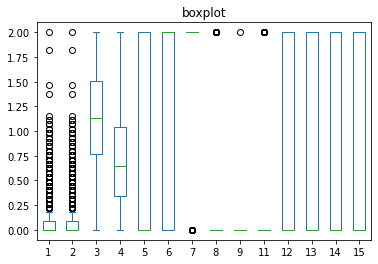

In [169]:
a=scaled_df["lymph_nodes_examined_positive"]  
b=scaled_df["lymph_nodes_examined_positive"]  
c=scaled_df["nottingham_prognostic_index"]   
d=scaled_df["overall_survival_months"] 
e=scaled_df["type_of_breast_surgery_BREAST_CONSERVING"] 
f=scaled_df["type_of_breast_surgery_MASTECTOMY"] 
g=scaled_df["Breast_Invasive_Ductal_Carcinoma"] 
h=scaled_df["Breast_Mixed_Ductal_and_Lobular_Carcinoma"] 
i=scaled_df["Metaplastic_Breast_Cancer"] 
j=scaled_df["cellularity_High"]      
k=scaled_df["cellularity_Low"]                                                   
l=scaled_df["cellularity_Moderate"  ]                                            
m=scaled_df["death_from_cancer_Died_of_Disease"]                                
n=scaled_df["death_from_cancer_Died_of_Other_Causes"  ]                          
o=scaled_df["death_from_cancer_Living" ]
data = pd.DataFrame({"1":a, "2": b, "3":c, "4": d,"5":e, "6": f, "7":g, "8": h, "9": i, "11": k, "12": l, "13": m, "14": n, "15": o})

# Plot the dataframe
ax = data.plot(kind='box', title='boxplot')

# Display the plot
plt.show()



> <h1> Cosas por hacer </h1>
>
> <h2> Limpieza de datos </h2>
>
> - Proponer la ecuación lineal
> - Normalizar la base de datos
> - Calcular parámetros estadísticos
>
> <h2> Prueba de hipótesis </h2>
>
> - Plantear hipótesis nula y alternativa
> - Graficar distribución
> - Plantear un modelo que se ajuste a la distribución
> - Aceptar o rechazar hipótesis nula
>
> <h2> Prueba ANOVA </h2>
>
> -